# Scientific computing
## Set 1
### 1.1 Vibrating string

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

In [19]:
# length of string
L = 1

# number of intervals x
Nx = 100

# width of an x increment
dx = L/Nx
print(dx)
C = 1

# discretize x
x = np.linspace(0, L, Nx + 1)

# number of intervals t
Nt = 1000

# timestep
dt = 0.001

# total time
T = 1

# c-squared of wave equation
c2 = (dx/dt)**2

print(c2)

0.01
100.0


In [ ]:
def sim():
    psi_initial_list = []
    for x_i in x:
        psi_i = psi_t0(x_i)
        psi_initial_list.append(psi_i)
    
    # boundary condition psi[L] = 0
    psi_initial_list[-1] = 0
    
    # dictionary of the geometry of string over all x for all timesteps
    psi_dict = {'psi (x, t = 0)': psi_initial_list, 'psi (x, t = 1)': psi_initial_list}
    
    for t in range(1, Nt):
        # list with geometry of string at time stip
        u = [0]
        u_j = psi_dict[f'psi (x, t = {t})']
        u_j_min_1 = psi_dict[f'psi (x, t = {t - 1})']
        for i in range(1, Nx):
            u_new = (c2*((dt/dx)**2)* (u_j[i + 1] + u_j[i - 1] - 2*u_j[i])) -  u_j_min_1[i] + 2*u_j[i]
            u.append(u_new)
            
        # add boundary condition
        u.append(0)
        psi_dict[f'psi (x, t = {t + 1})'] = u
    
    return psi_dict

    

i. $\psi(x, t=0) = \sin(2\pi x)$ 

In [ ]:
def psi_t0(x):
    return math.sin(2*math.pi*x)

psi_dict = sim()

for i in range(0,50,5):
    psi_t_list = psi_dict[f'psi (x, t = {i})']
    plt.plot(x, psi_t_list, label = f't = {i}')

plt.title(r'String with $\sin(2 \pi x)$')
plt.legend()
plt.show()


ii. $\psi(x, t=0) = \sin(5\pi x)$ 

In [ ]:
def psi_t0(x):
    return math.sin(5*math.pi*x)

psi_dict = sim()

for i in range(0,50,5):
    psi_t_list = psi_dict[f'psi (x, t = {i})']
    plt.plot(x, psi_t_list, label = f't = {i}')

plt.title(r'String with $\sin(5 \pi x)$')
plt.legend()
plt.show()


iii. $\psi(x, t=0) = \sin(5\pi x)$ if 1/5 < x < 2/5, else $\psi$ = 0 

In [ ]:
def sim_iii():
    psi_initial_list = []
    for x_i in x:
        if x_i > 1/5 and x_i < 2/5:
            psi_i = psi_t0(x_i)
        else:
            psi_i = 0
        psi_initial_list.append(psi_i)
            
    # boundary condition psi[L] = 0
    psi_initial_list[-1] = 0
    
    # dictionary of the geometry of string over all x for all timesteps
    psi_dict = {'psi (x, t = 0)': psi_initial_list, 'psi (x, t = 1)': psi_initial_list}
    
    for t in range(1, Nt):
        # list with geometry of string at time stip
        u = [0]
        u_j = psi_dict[f'psi (x, t = {t})']
        u_j_min_1 = psi_dict[f'psi (x, t = {t - 1})']
        for i in range(1, Nx):
            if x[i] > 1/5 and x[i] < 2/5:
                u_new = (c2*((dt/dx)**2)* (u_j[i + 1] + u_j[i - 1] - 2*u_j[i])) -  u_j_min_1[i] + 2*u_j[i]
            else:
                u_new = 0
                
            u.append(u_new)
            
        # add boundary condition
        u.append(0)
        psi_dict[f'psi (x, t = {t + 1})'] = u
    
    return psi_dict


def psi_t0(x):
    return math.sin(5*math.pi*x)

psi_dict = sim_iii()

for i in range(0,50,5):
    psi_t_list = psi_dict[f'psi (x, t = {i})']
    plt.plot(x, psi_t_list, label = f't = {i}')

plt.title(r'String with $\sin(5 \pi x)$')
plt.legend()
plt.show()

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots()

line, = ax.plot(x, np.sin(2*np.pi*x))


def animate(i):
    line.set_ydata(np.sin(2*np.pi*x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(1, 100), init_func=init,
                              interval=25, blit=True)

plt.show()

## All of the code above in a class

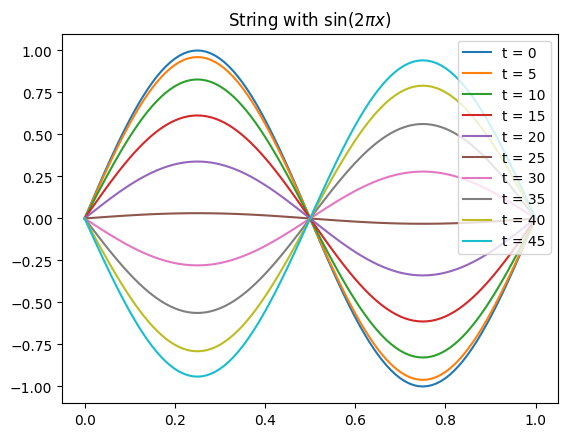

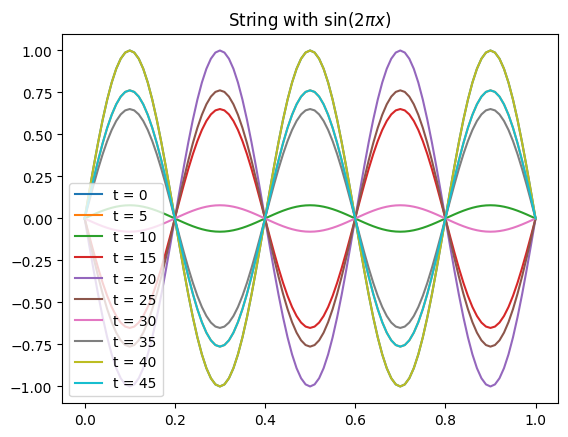

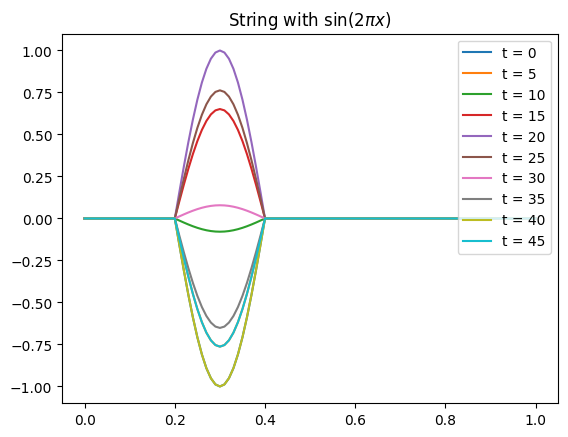

In [4]:
class Vibrating_String:

    def __init__(self, L, Nx, C, Nt, dt, T):
        # length of string
        self.L = L
        # number of intervals x
        self.Nx = Nx
        # width of an x increment
        self.dx = self.L / self.Nx
        self.C = 1
        self.x = np.linspace(0, self.L, self.Nx + 1)
        # number of intervals t
        self.Nt = Nt
        self.dt = dt
        self.T = 1
        self.c2 = (self.dx / self.dt) ** 2

    def psi1(self, x):
        return math.sin(2 * math.pi * x)

    def psi2(self, x):
        return math.sin(5 * math.pi * x)

    def psi3(self,x):
        if x > 1/5 and x < 2/5:
            return self.psi2(x)
        else:
            return 0
        
    def sim(self, psi_func):
        psi_initial_list = []
        for x_i in self.x:
            psi_i = psi_func(x_i)
            psi_initial_list.append(psi_i)

        # boundary condition psi[L] = 0
        psi_initial_list[-1] = 0

        # dictionary of the geometry of string over all x for all timesteps
        psi_dict = {'psi (x, t = 0)': psi_initial_list, 'psi (x, t = 1)': psi_initial_list}

        for t in range(1, self.Nt):
            # list with geometry of string at time stip
            u = [0]
            u_j = psi_dict[f'psi (x, t = {t})']
            u_j_min_1 = psi_dict[f'psi (x, t = {t - 1})']
            for i in range(1, self.Nx):
                if psi_func == self.psi3:
                    if self.x[i] > 1 / 5 and self.x[i] < 2 / 5:
                        u_new = (self.c2 * ((self.dt / self.dx) ** 2) * (u_j[i + 1] + u_j[i - 1] - 2 * u_j[i])) - \
                                u_j_min_1[i] + 2 * u_j[i]
                    else:
                        u_new = 0
                else:
                    u_new = (self.c2 * ((self.dt / self.dx) ** 2) * (u_j[i + 1] + u_j[i - 1] - 2 * u_j[i])) - u_j_min_1[
                        i] + 2 * u_j[i]
                u.append(u_new)

            # add boundary condition
            u.append(0)
            psi_dict[f'psi (x, t = {t + 1})'] = u

        return psi_dict

    def string_plot(self, func):
        for i in range(0, 50, 5):
            psi_t_list = self.sim(func)[f'psi (x, t = {i})']
            plt.plot(self.x, psi_t_list, label=f't = {i}')

        plt.title(r'String with $\sin(2 \pi x)$')
        plt.legend()
        plt.show()


vib_string = Vibrating_String(L=1, Nx=100, C=1, Nt=1000, dt=0.0001, T=1)
vib_string.string_plot(vib_string.psi1)
vib_string.string_plot(vib_string.psi2)
vib_string.string_plot(vib_string.psi3)
